## In house Calculations of Eastern Bering Sea Ice Extent in the manner of the SeaIce V3 product below.

### Define boundaries and cycle through all Bootstrap/NRT data

BS - 178E to Alaska (for EBS), 65.666N - all available points south.

We want to compare to the Daily Bering Sea ice extent during the past fourty years (data from the NSIDC Regional Sea Ice Index) which does a more comprehensive job of masking out the basin then the simple box, but we are only interested in the ice over the EBS shelf.  A 5day trailing average is applied to the regional extent product.

### SeaIce Extent V3 - Daily Updated

__pyversion__==3.7   
__author__==S.Bell

__general info__ https://nsidc.org/data/g02135   
__datasource__ ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/seaice_analysis/Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0.xlsx

See https://blogs.helmholtz.de/polarpredictionmatters/2018/07/polar-forecasts-against-impacts-of-declining-bering-sea-ice-on-alaska-coastal-communities-part-1/ for reference.

Sources and Citations (see data)
- Daily Bering Sea ice extent during the past fourty years (data from the NSIDC Regional Sea Ice Index)

- Fetterer, F., K. Knowles, W. Meier, M. Savoie, and A. K. Windnagel. 2017, updated daily. Sea Ice Index, Version 3. [Indicate subset used]. Boulder, Colorado USA. NSIDC: National Snow and Ice Data Center. doi: https://doi.org/10.7265/N5K072F8. [Date Accessed].

In [29]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import datetime


In [30]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [31]:
#fid = 'ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/seaice_analysis/Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0.xlsx'
fid = '/Users/bell/in_and_outbox/Ongoing_Analysis/SeaIce_Analysis/BeringSea_IceExtent/Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0 EBS edit.xlsx'
page = 'EBering-Extent-km^2' #Bering-Area-km^2

In [32]:
dfe = pd.read_excel(fid,sheet_name=page)

In [33]:
dfe = dfe.interpolate()
dfe['doy_y2'] = dfe.index+365

dfmean = dfe.copy()
dfmean.drop(columns=[2018,2017,2016,2015],inplace=True)
dfmean['avg'] = dfmean.drop(59,axis=0).drop(['month','day'], axis=1).mean(axis=1)

#make missing days after present day
dfe[2019][dfe[2019].index > int(datetime.datetime.strftime(datetime.datetime.now(),'%j'))] = np.nan

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


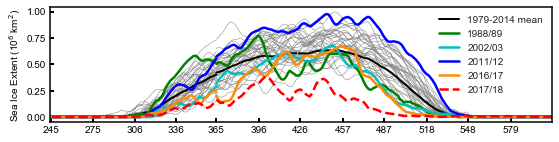

In [34]:
# start at Sep 1 (244)
# Area Extent in x10^6 km^2

fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for yy in range(1978,2018,1):
    plt.plot(dfe.index,dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    plt.plot(dfe['doy_y2'],dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    
#Fall
l1 = ax1.plot(dfmean.index,dfmean['avg']/1e6,'k',linewidth=2,label='1979-2014 mean')
l2 = ax1.plot(dfe.index,dfe[1988]/1e6,'g',linewidth=2.5,label='1988/89')
l3 = ax1.plot(dfe.index,dfe[2002]/1e6,'c-',linewidth=2.5,label='2002/03')
l4 = ax1.plot(dfe.index,dfe[2011]/1e6,'b-',linewidth=2.5,label='2011/12')
l5 = ax1.plot(dfe.index,dfe[2016]/1e6,'darkorange',linewidth=2.5,label='2016/17')
l6 = ax1.plot(dfe.index,dfe[2017]/1e6,'r--',linewidth=2.5,label='2017/18')
#l7 = ax1.plot(dfe.index,dfe[2018]/1e6,'y-',linewidth=2.5,label='2018/19')
#Spring
plt.plot(dfmean['doy_y2'],dfmean['avg']/1e6,'k',linewidth=2,label='')
plt.plot(dfe['doy_y2'],dfe[1989]/1e6,'g',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2003]/1e6,'c-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2012]/1e6,'b-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2017]/1e6,'darkorange',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2018]/1e6,'r--',linewidth=2.5,label='')
#plt.plot(dfe['doy_y2'],dfe[2019]/1e6,'y-',linewidth=2.5,label='')

plt.legend()
plt.xticks((0,31,61,92,122,153,183,214,245,275,306,336,
               0+365,31+365,61+365,92+365,122+365,153+365,
               183+365,214+365,245+365,275+365,306+365,336+365),)
ax1.set_xlim([244,244+365])
#plt.yticks(np.arange(0,1.2,.4))
ax1.tick_params(axis='y',which='both',bottom='on')
plt.ylabel('Sea Ice Extent (10$^{6}$ km$^{2}$)')
fig.savefig('images/EBS_fig1.png',dpi=300)
fig.savefig('images/EBS_fig1.svg',dpi=300)

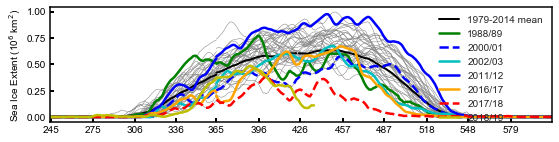

In [35]:
# start at Sep 1 (244)
# Area Extent in x10^6 km^2

fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for yy in range(1978,2018,1):
    plt.plot(dfe.index,dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    plt.plot(dfe['doy_y2'],dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    
#Fall
l1 = ax1.plot(dfmean.index,dfmean['avg']/1e6,'k',linewidth=2,label='1979-2014 mean')
l2 = ax1.plot(dfe.index,dfe[1988]/1e6,'g',linewidth=2.5,label='1988/89')
l3 = ax1.plot(dfe.index,dfe[2000]/1e6,'b--',linewidth=2.5,label='2000/01')
l4 = ax1.plot(dfe.index,dfe[2002]/1e6,'c-',linewidth=2.5,label='2002/03')
l5 = ax1.plot(dfe.index,dfe[2011]/1e6,'b-',linewidth=2.5,label='2011/12')
l6 = ax1.plot(dfe.index,dfe[2016]/1e6,'orange',linewidth=2.5,label='2016/17')
l7 = ax1.plot(dfe.index,dfe[2017]/1e6,'r--',linewidth=2.5,label='2017/18')
l8 = ax1.plot(dfe.index,dfe[2018]/1e6,'y-',linewidth=2.5,label='2018/19')
#Spring
plt.plot(dfmean['doy_y2'],dfmean['avg']/1e6,'k',linewidth=2,label='')
plt.plot(dfe['doy_y2'],dfe[1989]/1e6,'g',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2001]/1e6,'b--',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2003]/1e6,'c-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2012]/1e6,'b-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2017]/1e6,'orange',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2018]/1e6,'r--',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2019]/1e6,'y-',linewidth=2.5,label='')

plt.legend()
plt.xticks((0,31,61,92,122,153,183,214,245,275,306,336,
               0+365,31+365,61+365,92+365,122+365,153+365,
               183+365,214+365,245+365,275+365,306+365,336+365),)
ax1.set_xlim([244,244+365])
#plt.yticks(np.arange(0,1.2,.4))
ax1.tick_params(axis='y',which='both',bottom='on')
plt.ylabel('Sea Ice Extent (10$^{6}$ km$^{2}$)')
fig.savefig('images/EBS_fig2.png',dpi=300)
fig.savefig('images/EBS_fig2.svg',dpi=300)

In [36]:
dfe.head(75)

,month,day,Unnamed: 2,1978d,1979d,1980d,1981d,1982d,1983d,1984d,...,2019,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,doy,ice_extent,doy_y2
0,January,1,1,NaN,NaN,514844.0860,590344.414000,NaN,489353.504000,NaN,...,374044.421500,NaN,NaN,NaN,NaN,NaN,0,1,369610.063,365
1,NaN,2,2,NaN,299345.491000,527093.2805,596452.022000,401449.157000,501539.568000,324105.8080,...,375144.860500,NaN,NaN,NaN,NaN,NaN,1,2,371742.642,366
2,NaN,3,3,NaN,279909.832000,539342.4750,602559.630000,415248.567000,513725.632000,347624.1190,...,373294.969750,NaN,NaN,NaN,NaN,NaN,2,3,384621.463,367
3,NaN,4,4,NaN,260474.173000,533866.3130,581848.033500,429047.977000,536506.078500,371142.4300,...,375609.477000,NaN,NaN,NaN,NaN,NaN,3,4,376463.740,368
4,NaN,5,5,NaN,259867.950500,528390.1510,561136.437000,450077.088000,559286.525000,360924.8980,...,376833.930000,NaN,NaN,NaN,NaN,NaN,4,5,381731.742,369
5,NaN,6,6,NaN,259261.728000,525078.5095,580046.283500,471106.199000,566243.380500,350707.3660,...,379199.151400,NaN,NaN,NaN,NaN,NaN,5,6,381436.170,370
6,NaN,7,7,NaN,267281.054500,521766.8680,598956.130000,484420.166500,573200.236000,328975.6615,...,379286.488800,NaN,NaN,NaN,NaN,NaN,6,7,372179.329,371
7,NaN,8,8,NaN,275300.381000,530247.6650,582282.772000,497734.134000,577373.771000,307243.9570,...,378316.986600,NaN,NaN,NaN,NaN,NaN,7,8,379773.952,372
8,NaN,9,9,NaN,286036.142000,538728.4620,565609.414000,514650.676500,581547.306000,309052.3250,...,379566.671000,NaN,NaN,NaN,NaN,NaN,8,9,382712.162,373
9,NaN,10,10,NaN,296771.903000,558616.6740,555303.785500,531567.219000,593092.659500,310860.6930,...,378909.396800,NaN,NaN,NaN,NaN,NaN,9,10,378445.371,374


Isolate events in Northerly Winds that lead to anomolous Ice (Stabeno and Bell 2019, in press)